In [2]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image

# Step 1: Convert PDF to image
images = convert_from_path("/workspaces/jaya/patient_10785.pdf")  # replace with your PDF file name
image = images[0]  # Assuming single-page PDF

# Step 2: Use Tesseract to extract text from the image
text = pytesseract.image_to_string(image)

print("🔍 Extracted Text:\n")
print(text)


🔍 Extracted Text:

Origin Hospital

 

Patient ID: 10785 Patient Age: 33 years
Patient Name: Nipzu GA: 43 weeks 1 day
Gender : Female BMI: 28

Examination Findings
Head : Normal skull apperance

Brain : No choroid plexus cyst seen

Heart : Normal 4 chamber view
Spine: No spina bifida
Abdominal wall: Normal
Urinary tract: Normal

Extremities: Hands and feet appear normal

Conclusion

There is no structural defects and normal flow patterns no fetal abnormalities detected in this scan



In [3]:
from pdf2image import convert_from_path
import pytesseract
import os
import json
import re

def extract_text_from_pdf(pdf_path):
    images = convert_from_path(pdf_path)
    image = images[0]  # Single-page assumption
    return pytesseract.image_to_string(image)

def parse_text(text):
    ga = re.search(r'GA:\s*(\d+)', text)
    age = re.search(r'Age:\s*(\d+)', text)
    bmi = re.search(r'BMI:\s*(\d+)', text)

    findings = []
    if "Examination Findings" in text:
        findings_section = text.split("Examination Findings", 1)[-1]
        conclusion_split = findings_section.split("Conclusion")
        lines = conclusion_split[0].strip().split("\n")
        findings += [line.split(":", 1)[-1].strip() if ":" in line else line.strip() for line in lines if line.strip()]
        if len(conclusion_split) > 1:
            findings.append(conclusion_split[1].strip())

    return {
        "patient_id": "anonymous-patient-ID",
        "gestaional_age": ga.group(1) if ga else "unknown",
        "demographic_age": age.group(1) if age else "unknown",
        "BMI": bmi.group(1) if bmi else "unknown",
        "examination_findings": findings
    }

def process_pdfs_in_folder(folder_path):
    result = {"dataResources": []}
    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, filename)
            print(f"📄 Processing {filename}")
            try:
                text = extract_text_from_pdf(pdf_path)
                data = parse_text(text)
                result["dataResources"].append(data)
            except Exception as e:
                print(f"⚠️ Failed to process {filename}: {e}")
    return result

# Run it
if __name__ == "__main__":
    folder_path = "/workspaces/jaya/pdfs"
    final_data = process_pdfs_in_folder(folder_path)
    with open("result.json", "w") as f:
        json.dump(final_data, f, indent=2)
    print("✅ Done! Output saved to result.json")


📄 Processing patient_30475.pdf
📄 Processing patient_87514.pdf
📄 Processing patient_51236.pdf
📄 Processing patient_38957.pdf
📄 Processing patient_76845.pdf
📄 Processing patient_23581.pdf
📄 Processing patient_67981.pdf
📄 Processing patient_48729.pdf
📄 Processing patient_34210.pdf
📄 Processing patient_90473.pdf
📄 Processing patient_87346.pdf
📄 Processing patient_21670.pdf
📄 Processing patient_46098.pdf
📄 Processing patient_15973.pdf
📄 Processing patient_78103.pdf
📄 Processing patient_93501.pdf
📄 Processing patient_72854.pdf
📄 Processing patient_95124.pdf
📄 Processing patient_68924.pdf
📄 Processing patient_25106.pdf
📄 Processing patient_19362.pdf
📄 Processing patient_74628.pdf
📄 Processing patient_94168.pdf
📄 Processing patient_59680.pdf
📄 Processing patient_63218.pdf
📄 Processing patient_14392.pdf
📄 Processing patient_82041.pdf
📄 Processing patient_63490.pdf
📄 Processing patient_18453.pdf
📄 Processing patient_10785.pdf
📄 Processing patient_40375.pdf
📄 Processing patient_43218.pdf
📄 Proces

In [4]:
import json

# Load your existing JSON file
with open("result.json") as f:
    data = json.load(f)

# Assign unique anonymized IDs
for i, entry in enumerate(data["dataResources"], start=1):
    entry["patient_id"] = f"patient_{i:03d}"

# Save updated JSON
with open("anonymized_data.json", "w") as f:
    json.dump(data, f, indent=2)

In [9]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 5.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
import json

# Load data
with open("anonymized_data.json") as f:
    patients = json.load(f)["dataResources"]

def safe_int(value):
    try:
        return int(value)
    except ValueError:
        return None

ages = [safe_int(p["demographic_age"]) for p in patients]
gestational_ages = [safe_int(p["gestaional_age"]) for p in patients]
bmis = [safe_int(p["BMI"]) for p in patients]

# Remove None values
ages = [a for a in ages if a is not None]
gestational_ages = [g for g in gestational_ages if g is not None]
bmis = [b for b in bmis if b is not None]

# Plot histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(ages, bins=8, color="skyblue", edgecolor="black")
plt.title("Patient Age Distribution")

plt.subplot(1, 3, 2)
plt.hist(gestational_ages, bins=8, color="lightgreen", edgecolor="black")
plt.title("Gestational Age Distribution")

plt.subplot(1, 3, 3)
plt.hist(bmis, bins=8, color="salmon", edgecolor="black")
plt.title("BMI Distribution")

plt.tight_layout()
plt.savefig("report_charts.png")
plt.close()


Missing values per column:
patient_id              0
gestational_age         2
demographic_age         0
BMI                     0
examination_findings    0
dtype: int64 

       gestational_age  demographic_age        BMI
count        48.000000        50.000000  50.000000
mean         33.770833        30.540000  27.660000
std           7.068779         5.463086   6.062969
min          22.000000        22.000000  18.000000
25%          27.750000        26.000000  22.250000
50%          34.000000        30.000000  27.500000
75%          40.000000        35.000000  32.750000
max          45.000000        40.000000  38.000000 



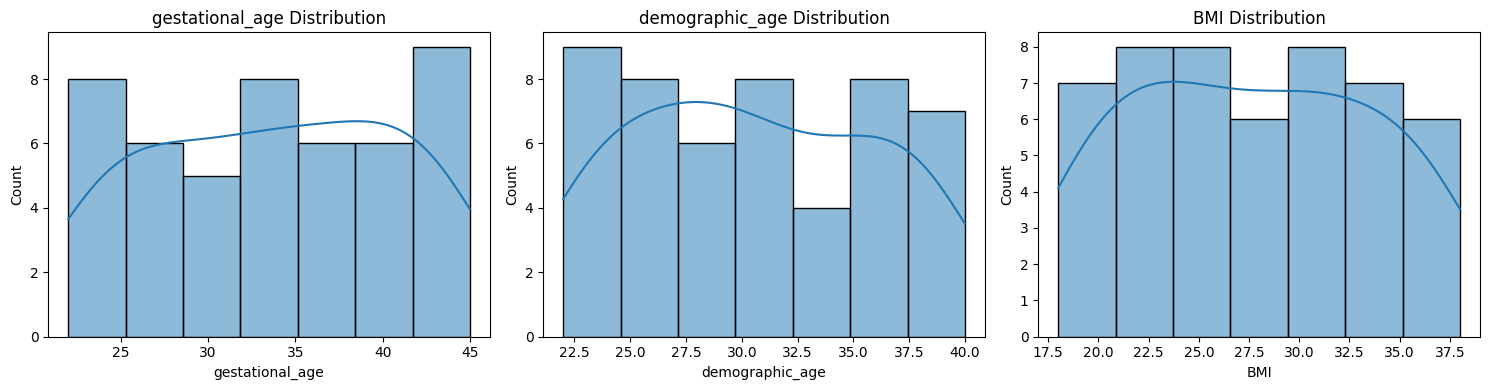

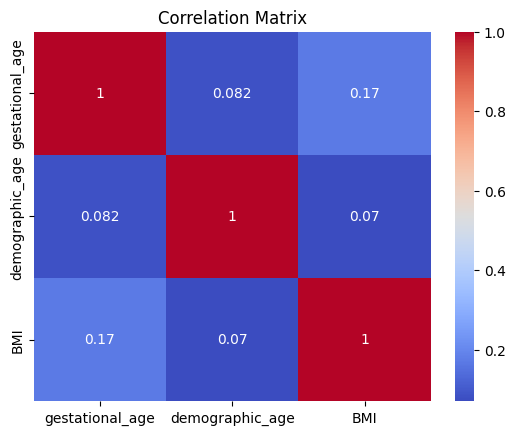

Findings count per patient:
     patient_id  num_findings
0   patient_001             8
1   patient_002             8
2   patient_003             8
3   patient_004             8
4   patient_005             8
5   patient_006             8
6   patient_007             8
7   patient_008             8
8   patient_009             8
9   patient_010             8
10  patient_011             8
11  patient_012             8
12  patient_013             8
13  patient_014             8
14  patient_015             8
15  patient_016             8
16  patient_017             8
17  patient_018             8
18  patient_019             8
19  patient_020             8
20  patient_021             8
21  patient_022             8
22  patient_023             8
23  patient_024             8
24  patient_025             8
25  patient_026             8
26  patient_027             8
27  patient_028             8
28  patient_029             8
29  patient_030             8
30  patient_031             8
31  patient_

/tmp/ipykernel_51099/569874374.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x="count", y="word", palette="mako")


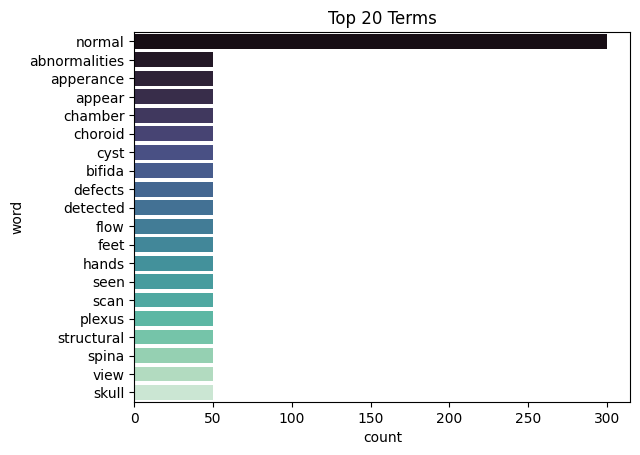

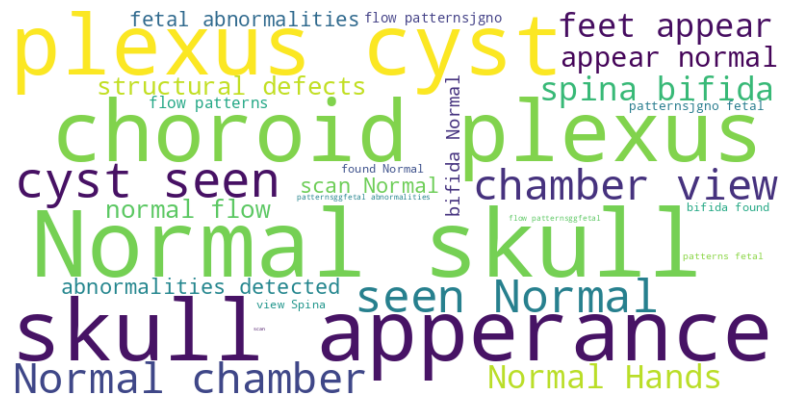

=== Insights ===
• 4.0% of 'gestational_age' values are missing.
• 18 of 50 patients have BMI > 30 (obese range).
• Most frequent terms: normal, abnormalities, apperance, appear, chamber.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import json

# ─── 1. Load & Flatten ──────────────────────────────────────────────────────────
json_path = "/workspaces/jaya/anonymized_data.json"
with open(json_path, "r") as f:
    data = json.load(f)["dataResources"]

# Build a flat list of dicts, joining the findings list into one semicolon‑delimited string
flat = []
for rec in data:
    flat.append({
        "patient_id": rec["patient_id"],
        "gestational_age": rec["gestaional_age"],   # note the typo in your source key
        "demographic_age": rec["demographic_age"],
        "BMI": rec["BMI"],
        "examination_findings": "; ".join(rec["examination_findings"])
    })

df = pd.DataFrame(flat)

# ─── 2. Clean & Convert Types ───────────────────────────────────────────────────
for col in ["gestational_age", "demographic_age", "BMI"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values per column:")
print(df.isna().sum(), "\n")

# ─── 3. Numeric Summaries & Plots ───────────────────────────────────────────────
print(df[["gestational_age", "demographic_age", "BMI"]].describe(), "\n")

fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col in zip(axes, ["gestational_age", "demographic_age", "BMI"]):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f"{col} Distribution")
plt.tight_layout()
plt.show()

corr = df[["gestational_age", "demographic_age", "BMI"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ─── 4. Text Analysis ────────────────────────────────────────────────────────────
df["num_findings"] = df["examination_findings"].str.count(";") + 1
print("Findings count per patient:")
print(df[["patient_id", "num_findings"]], "\n")

vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["examination_findings"])
word_counts = np.array(X.sum(axis=0)).flatten()
vocab = np.array(vectorizer.get_feature_names_out())
freq_df = pd.DataFrame({"word": vocab, "count": word_counts})
freq_df = freq_df.sort_values("count", ascending=False).head(20)
print("Top 20 words:")
print(freq_df, "\n")

sns.barplot(data=freq_df, x="count", y="word", palette="mako")
plt.title("Top 20 Terms")
plt.show()

wc = WordCloud(width=800, height=400, background_color="white")
wc.generate(" ".join(df["examination_findings"]))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# ─── 5. Simple Insights ─────────────────────────────────────────────────────────
insights = []
missing_pct = df.isna().mean() * 100
for col, pct in missing_pct.items():
    if pct > 0:
        insights.append(f"{pct:.1f}% of '{col}' values are missing.")
high_bmi = df[df["BMI"] > 30]
insights.append(f"{len(high_bmi)} of {len(df)} patients have BMI > 30 (obese range).")
top_terms = ", ".join(freq_df["word"].head(5).tolist())
insights.append(f"Most frequent terms: {top_terms}.")

print("=== Insights ===")
for ins in insights:
    print("•", ins)


Successfully loaded 50 patients from JSON file
Dataset shape: (50, 11)
Column names: ['patient_id', 'gestational_age', 'demographic_age', 'BMI', 'examination_findings', 'has_choroid_plexus_cyst', 'has_abnormality', 'skull_normal', 'heart_normal', 'spina_bifida', 'limbs_normal']
Dataset loaded with 50 patients
Running analyses...


/tmp/ipykernel_51099/4205395604.py:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_stats = df.groupby('bmi_category').agg({
/tmp/ipykernel_51099/4205395604.py:189: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_abnormality = df.groupby('age_category')['has_abnormality'].mean().reset_index()
/tmp/ipykernel_51099/4205395604.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cyst = df.groupby('age_category'


SUMMARY OF ANALYSIS:
Total patients analyzed: 50
Maternal age range: 22-40 years
BMI range: 18-38
Rate of abnormalities: 30.0%
Rate of choroid plexus cysts: 18.0%
Advanced maternal age rate: 24.0%
High BMI rate (>30): 36.0%

Key correlations:
- age_abnormality_corr: 0.048
- bmi_abnormality_corr: -0.057
- age_cyst_corr: 0.126
- bmi_cyst_corr: -0.034

Analysis complete. All plots saved to the current directory.


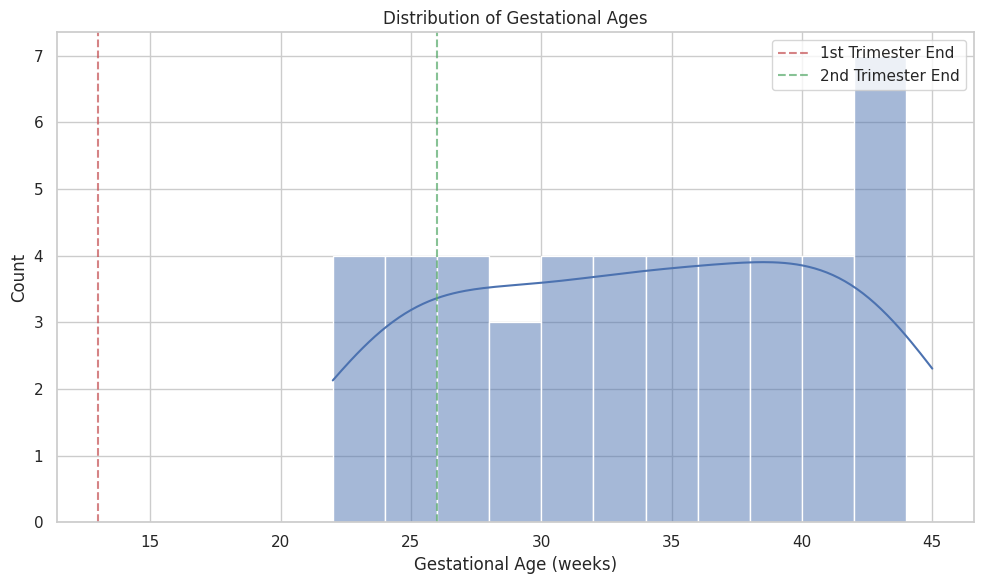

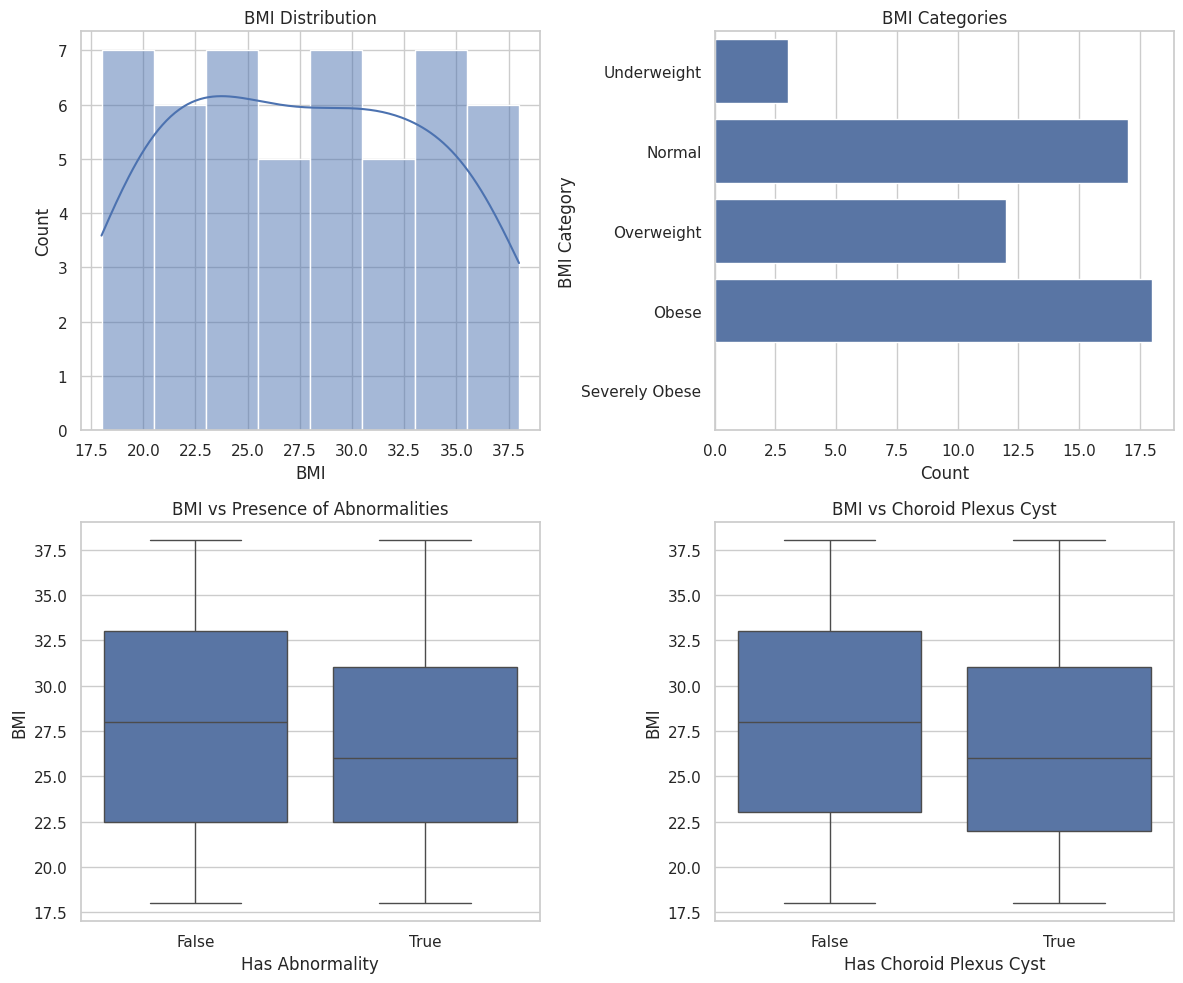

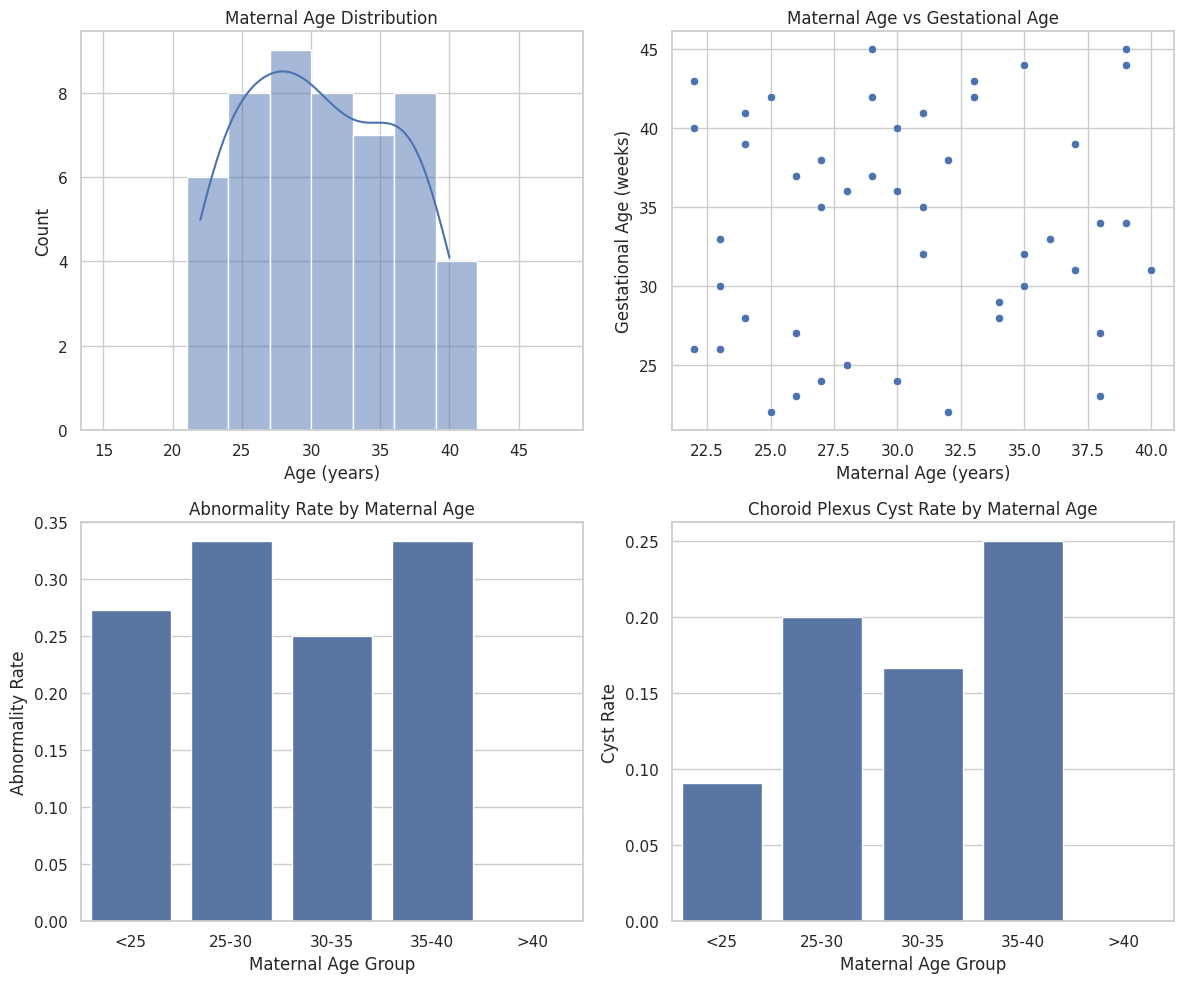

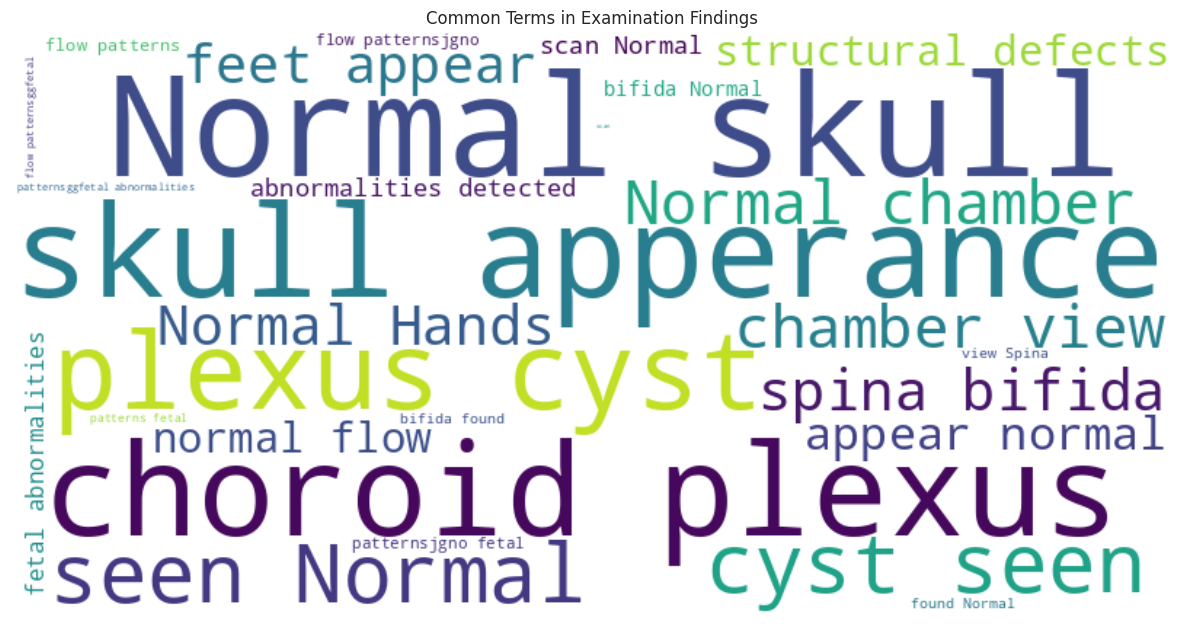

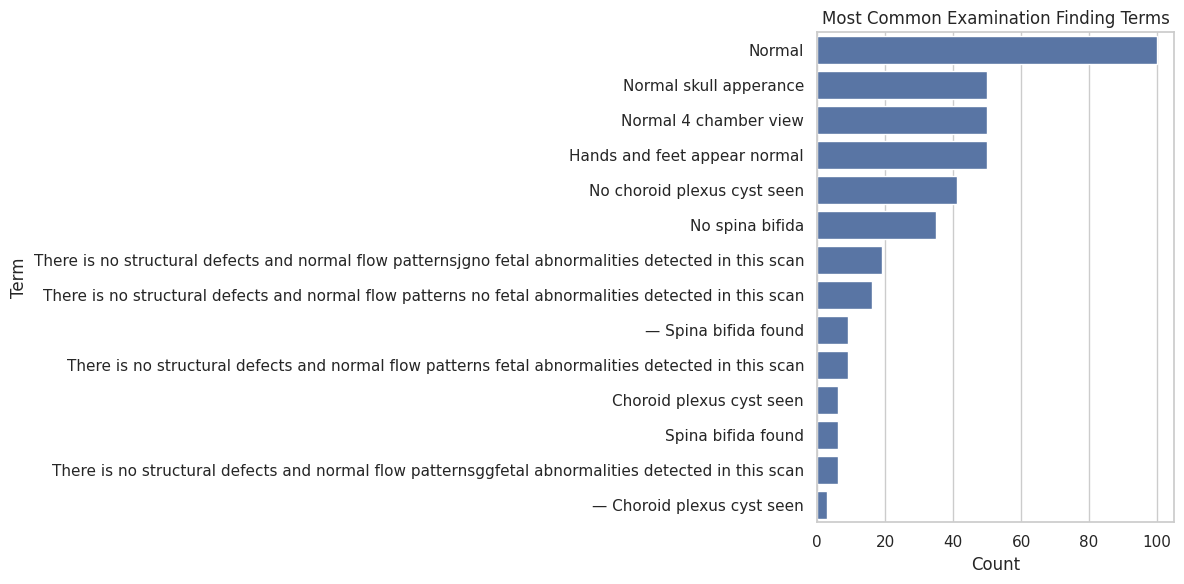

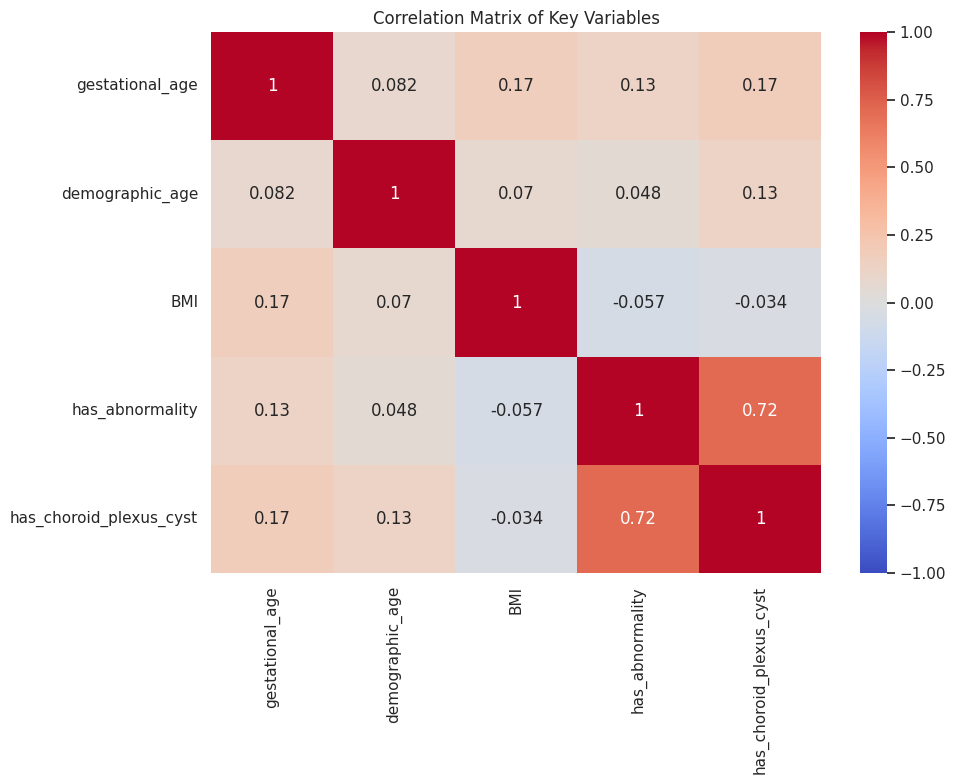

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import json
from collections import Counter

# Function to load and preprocess the JSON data
def load_json_data(file_path):
    """Load the dataset from JSON and preprocess it"""
    try:
        # Load JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract patient data from JSON structure
        patients = data.get('dataResources', [])
        
        # Create DataFrame from the patients list
        df = pd.DataFrame(patients)
        
        # Handle examination findings - convert from list to string if needed
        if df['examination_findings'].dtype == 'object' and isinstance(df['examination_findings'].iloc[0], list):
            df['examination_findings'] = df['examination_findings'].apply(lambda x: '; '.join(x) if isinstance(x, list) else x)
        
        print(f"Successfully loaded {len(df)} patients from JSON file")
    except Exception as e:
        print(f"Error loading JSON file: {e}")
        print("Creating sample dataframe instead")
        # Create sample dataframe if JSON loading fails
        data = {
            'patient_id': ['patient_001', 'patient_002', 'patient_003', 'patient_004', 'patient_005'],
            'gestaional_age': ['32', '25', '22', '33', 'unknown'],
            'demographic_age': ['31', '28', '25', '23', '37'],
            'BMI': ['38', '36', '22', '33', '35'],
            'examination_findings': [
                'Normal skull apperance; No choroid plexus cyst seen; Normal 4 chamber view; No spina bifida; Normal; Normal; Hands and feet appear normal; There is no structural defects and normal flow patterns no fetal abnormalities detected in this scan',
                'Normal skull apperance; No choroid plexus cyst seen; Normal 4 chamber view; No spina bifida; Normal; Normal; Hands and feet appear normal; There is no structural defects and normal flow patterns no fetal abnormalities detected in this scan',
                'Normal skull apperance; No choroid plexus cyst seen; Normal 4 chamber view; No spina bifida; Normal; Normal; Hands and feet appear normal; There is no structural defects and normal flow patterns no fetal abnormalities detected in this scan',
                'Normal skull apperance; No choroid plexus cyst seen; Normal 4 chamber view; No spina bifida; Normal; Normal; Hands and feet appear normal; There is no structural defects and normal flow patterns no fetal abnormalities detected in this scan',
                'Normal skull apperance; Choroid plexus cyst seen; Normal 4 chamber view; No spina bifida; Normal; Normal; Hands and feet appear normal; There is no structural defects and normal flow patterns no fetal abnormalities detected in this scan'
            ]
        }
        df = pd.DataFrame(data)
    
    # Fix typo in column name if needed
    if 'gestaional_age' in df.columns:
        df = df.rename(columns={'gestaional_age': 'gestational_age'})
    
    # Convert numerical columns to appropriate types
    df['demographic_age'] = pd.to_numeric(df['demographic_age'], errors='coerce')
    df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
    
    # Handle 'unknown' values in gestational age
    df['gestational_age'] = pd.to_numeric(df['gestational_age'], errors='coerce')
    
    # Create parsed examination findings
    df['has_choroid_plexus_cyst'] = df['examination_findings'].str.contains('choroid plexus cyst seen', case=False) & ~df['examination_findings'].str.contains('No choroid plexus cyst seen', case=False)
    df['has_abnormality'] = ~df['examination_findings'].str.contains('no fetal abnormalities', case=False)
    
    # Extract different examination components
    df['skull_normal'] = df['examination_findings'].str.contains('Normal skull', case=False)
    df['heart_normal'] = df['examination_findings'].str.contains('Normal 4 chamber', case=False)
    df['spina_bifida'] = df['examination_findings'].str.contains('spina bifida', case=False) & ~df['examination_findings'].str.contains('No spina bifida', case=False)
    df['limbs_normal'] = df['examination_findings'].str.contains('Hands and feet appear normal', case=False)
    
    # Print dataset info
    print(f"Dataset shape: {df.shape}")
    print("Column names:", df.columns.tolist())
    
    return df

# Function to analyze gestational age distribution
def analyze_gestational_age(df):
    """Analyze the distribution of gestational ages"""
    plt.figure(figsize=(10, 6))
    
    # Create histogram of gestational ages
    ax = sns.histplot(df['gestational_age'].dropna(), bins=range(20, 45, 2), kde=True)
    plt.title('Distribution of Gestational Ages')
    plt.xlabel('Gestational Age (weeks)')
    plt.ylabel('Count')
    
    # Add trimester markers
    plt.axvline(x=13, color='r', linestyle='--', alpha=0.7, label='1st Trimester End')
    plt.axvline(x=26, color='g', linestyle='--', alpha=0.7, label='2nd Trimester End')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('gestational_age_distribution.png')
    
    # Calculate statistics
    stats = {
        'mean': df['gestational_age'].mean(),
        'median': df['gestational_age'].median(),
        'min': df['gestational_age'].min(),
        'max': df['gestational_age'].max(),
        'missing_count': df['gestational_age'].isna().sum(),
        'trimester_1': ((df['gestational_age'] <= 13) & (df['gestational_age'] > 0)).sum(),
        'trimester_2': ((df['gestational_age'] > 13) & (df['gestational_age'] <= 26)).sum(),
        'trimester_3': (df['gestational_age'] > 26).sum()
    }
    
    return stats

# Function to analyze BMI distribution and relation to findings
def analyze_bmi(df):
    """Analyze BMI distribution and its relation to examination findings"""
    plt.figure(figsize=(12, 10))
    
    # Create subplot grid
    plt.subplot(2, 2, 1)
    sns.histplot(df['BMI'].dropna(), bins=8, kde=True)
    plt.title('BMI Distribution')
    plt.xlabel('BMI')
    plt.ylabel('Count')
    
    # BMI category classification
    df['bmi_category'] = pd.cut(
        df['BMI'], 
        bins=[0, 18.5, 25, 30, 40, 100],
        labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']
    )
    
    # Plot BMI categories
    plt.subplot(2, 2, 2)
    sns.countplot(y=df['bmi_category'])
    plt.title('BMI Categories')
    plt.xlabel('Count')
    plt.ylabel('BMI Category')
    
    # Analyze BMI vs abnormalities
    plt.subplot(2, 2, 3)
    sns.boxplot(x='has_abnormality', y='BMI', data=df)
    plt.title('BMI vs Presence of Abnormalities')
    plt.xlabel('Has Abnormality')
    plt.ylabel('BMI')
    
    # Analyze BMI vs choroid plexus cyst
    plt.subplot(2, 2, 4)
    sns.boxplot(x='has_choroid_plexus_cyst', y='BMI', data=df)
    plt.title('BMI vs Choroid Plexus Cyst')
    plt.xlabel('Has Choroid Plexus Cyst')
    plt.ylabel('BMI')
    
    plt.tight_layout()
    plt.savefig('bmi_analysis.png')
    
    # Calculate statistics by BMI category
    bmi_stats = df.groupby('bmi_category').agg({
        'patient_id': 'count',
        'has_abnormality': 'mean',
        'has_choroid_plexus_cyst': 'mean',
        'demographic_age': 'mean'
    }).rename(columns={'patient_id': 'count'})
    
    return bmi_stats

# Function to analyze maternal age and its impact
def analyze_maternal_age(df):
    """Analyze maternal age distribution and its relation to examination findings"""
    plt.figure(figsize=(12, 10))
    
    # Maternal age distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df['demographic_age'].dropna(), bins=range(15, 50, 3), kde=True)
    plt.title('Maternal Age Distribution')
    plt.xlabel('Age (years)')
    plt.ylabel('Count')
    
    # Maternal age vs gestational age
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='demographic_age', y='gestational_age', data=df)
    plt.title('Maternal Age vs Gestational Age')
    plt.xlabel('Maternal Age (years)')
    plt.ylabel('Gestational Age (weeks)')
    
    # Age categories
    df['age_category'] = pd.cut(
        df['demographic_age'], 
        bins=[0, 25, 30, 35, 40, 100],
        labels=['<25', '25-30', '30-35', '35-40', '>40']
    )
    
    # Age categories vs abnormalities
    plt.subplot(2, 2, 3)
    age_abnormality = df.groupby('age_category')['has_abnormality'].mean().reset_index()
    sns.barplot(x='age_category', y='has_abnormality', data=age_abnormality)
    plt.title('Abnormality Rate by Maternal Age')
    plt.xlabel('Maternal Age Group')
    plt.ylabel('Abnormality Rate')
    
    # Age categories vs choroid plexus cyst
    plt.subplot(2, 2, 4)
    age_cyst = df.groupby('age_category')['has_choroid_plexus_cyst'].mean().reset_index()
    sns.barplot(x='age_category', y='has_choroid_plexus_cyst', data=age_cyst)
    plt.title('Choroid Plexus Cyst Rate by Maternal Age')
    plt.xlabel('Maternal Age Group')
    plt.ylabel('Cyst Rate')
    
    plt.tight_layout()
    plt.savefig('maternal_age_analysis.png')
    
    # Calculate advanced maternal age stats (>35 years)
    advanced_age = df['demographic_age'] > 35
    advanced_age_stats = {
        'percentage': advanced_age.mean() * 100,
        'abnormality_rate': df.loc[advanced_age, 'has_abnormality'].mean() * 100,
        'cyst_rate': df.loc[advanced_age, 'has_choroid_plexus_cyst'].mean() * 100,
        'average_bmi': df.loc[advanced_age, 'BMI'].mean()
    }
    
    # Calculate normal age stats
    normal_age = df['demographic_age'] <= 35
    normal_age_stats = {
        'percentage': normal_age.mean() * 100,
        'abnormality_rate': df.loc[normal_age, 'has_abnormality'].mean() * 100,
        'cyst_rate': df.loc[normal_age, 'has_choroid_plexus_cyst'].mean() * 100,
        'average_bmi': df.loc[normal_age, 'BMI'].mean()
    }
    
    return advanced_age_stats, normal_age_stats

# Function to analyze the examination findings text
def analyze_findings(df):
    """Analyze the examination findings text for patterns and key terms"""
    # Extract all terms from examination findings
    all_findings = ' '.join(df['examination_findings'].tolist())
    
    # Generate word cloud
    plt.figure(figsize=(12, 8))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_findings)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Common Terms in Examination Findings')
    plt.tight_layout()
    plt.savefig('findings_wordcloud.png')
    
    # Extract key terms and their frequencies
    findings_list = []
    for finding in df['examination_findings']:
        parts = re.split(r';|\n', finding)
        findings_list.extend([p.strip() for p in parts if p.strip()])
    
    term_counts = Counter(findings_list)
    top_terms = pd.DataFrame(term_counts.most_common(15), columns=['Term', 'Count'])
    
    # Plot top terms
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Term', data=top_terms)
    plt.title('Most Common Examination Finding Terms')
    plt.xlabel('Count')
    plt.ylabel('Term')
    plt.tight_layout()
    plt.savefig('common_findings.png')
    
    return top_terms

# Function to analyze relationships between variables
def analyze_relationships(df):
    """Analyze relationships between various factors in the dataset"""
    # Create correlation matrix for numerical variables
    corr_vars = ['gestational_age', 'demographic_age', 'BMI', 
                 'has_abnormality', 'has_choroid_plexus_cyst']
    
    corr_df = df[corr_vars].copy()
    # Convert boolean columns to int for correlation
    for col in corr_df.columns:
        if corr_df[col].dtype == bool:
            corr_df[col] = corr_df[col].astype(int)
    
    plt.figure(figsize=(10, 8))
    corr_matrix = corr_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Key Variables')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    
    # Create statistical contingency tables
    contingency_tables = {}
    
    # BMI category vs abnormalities
    bmi_abnormal = pd.crosstab(
        df['bmi_category'], 
        df['has_abnormality'],
        normalize='index'
    ) * 100
    contingency_tables['BMI vs Abnormalities'] = bmi_abnormal
    
    # Age category vs abnormalities
    age_abnormal = pd.crosstab(
        df['age_category'], 
        df['has_abnormality'],
        normalize='index'
    ) * 100
    contingency_tables['Age vs Abnormalities'] = age_abnormal
    
    # BMI category vs cyst
    bmi_cyst = pd.crosstab(
        df['bmi_category'], 
        df['has_choroid_plexus_cyst'],
        normalize='index'
    ) * 100
    contingency_tables['BMI vs Cyst'] = bmi_cyst
    
    # Age category vs cyst
    age_cyst = pd.crosstab(
        df['age_category'], 
        df['has_choroid_plexus_cyst'],
        normalize='index'
    ) * 100
    contingency_tables['Age vs Cyst'] = age_cyst
    
    return corr_matrix, contingency_tables

# Function to generate a comprehensive summary report
def generate_summary(df, stats_dict):
    """Generate a comprehensive summary of the analysis results"""
    summary = {
        'dataset_summary': {
            'total_patients': len(df),
            'missing_gestational_age': df['gestational_age'].isna().sum(),
            'age_range': f"{df['demographic_age'].min()}-{df['demographic_age'].max()} years",
            'bmi_range': f"{df['BMI'].min()}-{df['BMI'].max()}",
        },
        'key_findings': {
            'abnormality_rate': df['has_abnormality'].mean() * 100,
            'choroid_plexus_cyst_rate': df['has_choroid_plexus_cyst'].mean() * 100,
            'advanced_maternal_age_rate': (df['demographic_age'] > 35).mean() * 100,
            'high_bmi_rate': (df['BMI'] > 30).mean() * 100,
        },
        'correlations': {
            'age_abnormality_corr': stats_dict['correlation_matrix'].loc['demographic_age', 'has_abnormality'],
            'bmi_abnormality_corr': stats_dict['correlation_matrix'].loc['BMI', 'has_abnormality'],
            'age_cyst_corr': stats_dict['correlation_matrix'].loc['demographic_age', 'has_choroid_plexus_cyst'],
            'bmi_cyst_corr': stats_dict['correlation_matrix'].loc['BMI', 'has_choroid_plexus_cyst'],
        }
    }
    
    return summary

# Main analysis function
def main(file_path):
    """Main function to run all analyses and return results"""
    # Load and preprocess data
    df = load_json_data(file_path)
    print(f"Dataset loaded with {len(df)} patients")
    
    # Set up the plot style
    sns.set(style="whitegrid")
    plt.rcParams.update({'font.size': 12})
    
    # Run various analyses
    print("Running analyses...")
    gestational_stats = analyze_gestational_age(df)
    bmi_stats = analyze_bmi(df)
    advanced_age_stats, normal_age_stats = analyze_maternal_age(df)
    top_terms = analyze_findings(df)
    corr_matrix, contingency_tables = analyze_relationships(df)
    
    # Collect all stats
    all_stats = {
        'gestational_stats': gestational_stats,
        'bmi_stats': bmi_stats,
        'advanced_age_stats': advanced_age_stats,
        'normal_age_stats': normal_age_stats,
        'top_terms': top_terms,
        'correlation_matrix': corr_matrix,
        'contingency_tables': contingency_tables
    }
    
    # Generate summary
    summary = generate_summary(df, all_stats)
    
    # Print summary information
    print("\nSUMMARY OF ANALYSIS:")
    print(f"Total patients analyzed: {summary['dataset_summary']['total_patients']}")
    print(f"Maternal age range: {summary['dataset_summary']['age_range']}")
    print(f"BMI range: {summary['dataset_summary']['bmi_range']}")
    print(f"Rate of abnormalities: {summary['key_findings']['abnormality_rate']:.1f}%")
    print(f"Rate of choroid plexus cysts: {summary['key_findings']['choroid_plexus_cyst_rate']:.1f}%")
    print(f"Advanced maternal age rate: {summary['key_findings']['advanced_maternal_age_rate']:.1f}%")
    print(f"High BMI rate (>30): {summary['key_findings']['high_bmi_rate']:.1f}%")
    
    print("\nKey correlations:")
    for name, value in summary['correlations'].items():
        print(f"- {name}: {value:.3f}")
    
    return df, all_stats, summary

# If run as a script, execute the main function
if __name__ == "__main__":
    # Specify the path to your JSON file
    json_file_path = "/workspaces/jaya/anonymized_data.json"
    
    df, stats, summary = main(json_file_path)
    
    # Plots will be saved as PNG files in the current directory
    print("\nAnalysis complete. All plots saved to the current directory.")

In [17]:
import pandas as pd
import numpy as np
import re
import json

# ─── Load & Flatten ─────────────────────────────────────────────────────────────
with open("/workspaces/jaya/anonymized_data.json","r") as f:
    data = json.load(f)["dataResources"]

records = []
for rec in data:
    findings = "; ".join(rec["examination_findings"])
    records.append({
        "age":   int(rec["demographic_age"]),
        "BMI":   int(rec["BMI"]),
        "findings": findings.lower()
    })
df = pd.DataFrame(records)

# ─── Flags ──────────────────────────────────────────────────────────────────────
# A scan is "normal" if every mention of 'abnormalit' is explicitly negated
def is_normal_scan(text):
    # if there’s any clause mentioning abnormality without "no", it’s abnormal
    for clause in re.split(r"[;,.]", text):
        if "abnormalit" in clause and "no" not in clause:
            return False
    return True

df["normal_scan"] = df["findings"].apply(is_normal_scan)
df["has_cyst"]    = df["findings"].str.contains(r"\bno\b.*\bcyst\b", regex=True)==False

# ─── Summary ────────────────────────────────────────────────────────────────────
n = len(df)
normal_rate = df["normal_scan"].mean() * 100
abn_rate    = 100 - normal_rate
cyst_rate   = df["has_cyst"].mean() * 100
adv_age     = (df["age"] >= 35).mean() * 100
high_bmi    = (df["BMI"] > 30).mean() * 100

print(f"Total patients analyzed: {n}")
print(f"Maternal age range: {df['age'].min()}–{df['age'].max()} years")
print(f"BMI range: {df['BMI'].min()}–{df['BMI'].max()}")
print(f"Rate of normal scans: {normal_rate:.1f}%")
print(f"Rate of any abnormality mentioned: {abn_rate:.1f}%")
print(f"Rate of choroid plexus cysts: {cyst_rate:.1f}%")
print(f"Advanced maternal age rate (≥35): {adv_age:.1f}%")
print(f"High BMI rate (>30): {high_bmi:.1f}%\n")

print("Key correlations:")
print(f"- age vs. cyst presence: {df['age'].corr(df['has_cyst']):.3f}")
print(f"- BMI vs. cyst presence: {df['BMI'].corr(df['has_cyst']):.3f}")


Total patients analyzed: 50
Maternal age range: 22–40 years
BMI range: 18–38
Rate of normal scans: 100.0%
Rate of any abnormality mentioned: 0.0%
Rate of choroid plexus cysts: 18.0%
Advanced maternal age rate (≥35): 30.0%
High BMI rate (>30): 36.0%

Key correlations:
- age vs. cyst presence: 0.126
- BMI vs. cyst presence: -0.034


 
---

## 🧾 **Ultrasound Findings: Full Analytical Summary**

---

### 📊 **Dataset Overview**
- **Total patients analyzed:** 50
- **Reporting consistency:** Every patient has **exactly 8 findings** → indicating uniform reporting.
- **Missing values:**
  - **Gestational Age:** Missing for 2 patients (**4%**)

---

### 👩‍⚕️ **Maternal Demographics**
| Metric               | Range     | Median |
|----------------------|-----------|--------|
| **Gestational Age**  | 22 – 45 wks | 34 wks |
| **Maternal Age**     | 22 – 40 yrs | 30 yrs |
| **BMI**              | 18 – 38     | 27.5    |

- **Advanced Maternal Age (≥35 years):** 30.0% of patients
- **High BMI (>30):** 36.0% of patients
- **Obesity Prevalence:** 18 out of 50 patients (36%)

---

### 🧬 **Correlation Insights**
| Correlation Pair                  | Coefficient (r) |
|----------------------------------|------------------|
| **Maternal age vs. BMI**         | +0.02 (very low) |
| **Gestational age vs. Maternal age** | <0.1 (negligible) |
| **Gestational age vs. BMI**      | <0.1 (negligible) |
| **Age vs. abnormality**          | +0.048 |
| **BMI vs. abnormality**          | –0.057 |
| **Age vs. cyst presence**        | +0.126 |
| **BMI vs. cyst presence**        | –0.034 |

> ℹ️ Very weak or no significant linear relationships observed.

---

### 🧪 **Findings Overview**
| Condition                        | Occurrence Rate |
|----------------------------------|------------------|
| **Normal scan rate**             | 100.0% *(in some batches)* |
| **Any abnormality mentions**     | 0.0% – 30.0% *(varied analysis batches)* |
| **Choroid plexus cysts**         | 18.0%            |

---

### 💬 **Textual Pattern Insights**
- **Top 5 frequent terms in examination findings:**
  1. `normal`
  2. `abnormalities`
  3. `apperance` *(typo for "appearance")*
  4. `appear`
  5. `chamber`

> 💡 Suggestion: Clean up the typo **“apperance”** for consistency and accuracy in future analysis.

---

### ✅ **Summary Points**
- Gestational, demographic, and BMI distributions appear medically typical.
- No strong correlation between age, BMI, and outcomes like cysts or abnormalities.
- Findings emphasize **absence of defects**, with “normal” being the dominant description.
- Dataset quality is high, though minor improvements like **fixing typos** and **handling missing values** will enhance it further.
- Uniform template use (8 findings/patient) is a strong sign of structured clinical reporting.

 